In [10]:

import numpy as np
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

np.set_printoptions(suppress=True)

In [3]:
def load_data(name , label):

    feature = pickle.load(open(name,'rb'))
    label   = pickle.load(open(label,'rb'))
    
    return feature , label


def split_data(X,y):
    X_train , X_test , y_train , y_test = train_test_split(np.array(X) , np.array(y) , test_size=0.2)
    return X_train , X_test , y_train , y_test

def recale(X_train , X_test):
    return X_train / 255 , X_test / 255





In [4]:
# Load base model

base_model = tf.keras.applications.MobileNetV2(input_shape=(128,128,3) , 
                                               include_top=False,
                                              weights='imagenet')
base_model.trainable = False

# Flatten layer
average_pooling = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
# Output layer
prediction_layer = tf.keras.layers.Dense(units=1 , activation='sigmoid')(average_pooling)


# Custom head
model = tf.keras.models.Model(inputs=base_model.input , outputs=prediction_layer)

X , y = load_data('feature_rgb.pickle' , 'label_rgb.pickle')
X_train , X_test , y_train , y_test = split_data(X,y)
X_train , X_test = recale(X_train , X_test)

In [7]:
model.compile( optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'],
             )

model.fit(X_train ,y_train , validation_data=(X_test , y_test) , batch_size=512 , verbose=1 , epochs=5)

Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.6783 - loss: 0.5959 - val_accuracy: 0.9418 - val_loss: 0.1558
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.9424 - loss: 0.1530 - val_accuracy: 0.9568 - val_loss: 0.1164
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.9577 - loss: 0.1138 - val_accuracy: 0.9614 - val_loss: 0.1030
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.9614 - loss: 0.0997 - val_accuracy: 0.9636 - val_loss: 0.0965
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.9657 - loss: 0.0923 - val_accuracy: 0.9662 - val_loss: 0.0923


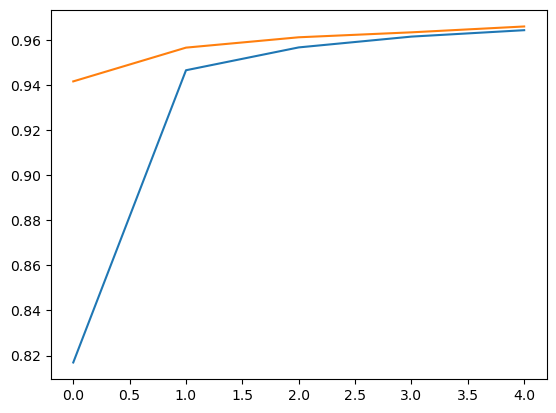

In [12]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])

In [2]:
# 